## Классификация постов
Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина поста
max_len = 11
# Количество классов
nb_classes = 15

## Загрузка набора данных

In [3]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [4]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2)

In [7]:
train

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
26,🤩,6,1,joy,positive,2,"плюсани, если нравится этот актёр 🤩"
6634,🤣,4,1,smile,positive/negative,0,скорее на оборот 🤣
6239,🤣,5,1,smile,positive/negative,0,межевали по полной!🤣
2619,😊,4,1,smile,positive/negative,0,всё верно товарищи 😊
4425,😎,5,1,no_emotion,positive/negative,3,есть неполадки уже чиним 😎
...,...,...,...,...,...,...,...
3351,🤣,5,1,smile,positive/negative,0,как и моя вас🤣
6111,🤣,7,1,smile,positive/negative,0,можно будет обвинить его в гомосексуализме 🤣
6954,😄,5,1,smile,positive/negative,0,фантазёр ты его называаааала 😄
7364,🤗,9,1,joy,positive,2,"дайте ссылку на самую первую серию, пожалуйста)🤗"


Выделяем данные для обучения

In [8]:
posts = train['clean_text']

In [9]:
posts[:5]

26      плюсани, если нравится этот актёр 🤩
6634                     скорее на оборот 🤣
6239                   межевали по полной!🤣
2619                   всё верно товарищи 😊
4425             есть неполадки уже чиним 😎
Name: clean_text, dtype: object

Выделяем правильные ответы

In [10]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [11]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Токенизация текста

Создаем токенизатор Keras

In [13]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на постах

In [14]:
tokenizer.fit_on_texts(posts)

Просматриваем словарь токенизатора

In [15]:
tokenizer.word_index

{'не': 1,
 'и': 2,
 'в': 3,
 '🤣': 4,
 'а': 5,
 'это': 6,
 'что': 7,
 '😂': 8,
 'я': 9,
 'на': 10,
 '😁': 11,
 'так': 12,
 'у': 13,
 'как': 14,
 'с': 15,
 '😅': 16,
 'то': 17,
 'ты': 18,
 'ну': 19,
 'да': 20,
 'же': 21,
 '😄': 22,
 'вот': 23,
 'за': 24,
 '🤔': 25,
 'все': 26,
 'по': 27,
 'тоже': 28,
 'вы': 29,
 'уже': 30,
 '😊': 31,
 '😏': 32,
 'он': 33,
 '😉': 34,
 'мне': 35,
 '😆': 36,
 'бы': 37,
 'меня': 38,
 'просто': 39,
 'только': 40,
 'когда': 41,
 'для': 42,
 '😍': 43,
 'из': 44,
 'они': 45,
 'кто': 46,
 'она': 47,
 'ещё': 48,
 'есть': 49,
 '😃': 50,
 'от': 51,
 'спасибо': 52,
 'если': 53,
 'нет': 54,
 'там': 55,
 'но': 56,
 'к': 57,
 'очень': 58,
 '😎': 59,
 'всё': 60,
 'будет': 61,
 'надо': 62,
 'тебя': 63,
 'его': 64,
 'может': 65,
 'было': 66,
 'или': 67,
 '😳': 68,
 'тебе': 69,
 '❤': 70,
 'вообще': 71,
 'даже': 72,
 'можно': 73,
 'до': 74,
 'вам': 75,
 'без': 76,
 'точно': 77,
 'какой': 78,
 'тут': 79,
 'тогда': 80,
 'лучше': 81,
 'о': 82,
 'вас': 83,
 'где': 84,
 'этот': 85,
 'такой': 

Преобразуем посты в числовое представление

In [16]:
sequences = tokenizer.texts_to_sequences(posts)

In [17]:
index = 100
print(posts[index])
print(sequences[index])

❤, если здесь не хватает коли
[899, 150, 3193]


In [18]:
tokenizer.word_index['здесь']

194

Ограничиваем длину постов

In [19]:
x_train = pad_sequences(sequences, maxlen=max_len)

In [20]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,  883,   10,  884,    8],
       [   0,    0,    0,    0,    0,    0,    0,  723,   17,  724,   22],
       [   0,    0,    0,    0,    0,    0,    0,   14,   13,   38, 3058],
       [   0,    0,    0,    9, 3059,    1, 3060, 3061, 3062,   10, 3063],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   15, 3064]],
      dtype=int32)

In [21]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [22]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [23]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Сверточная нейронная сеть

In [24]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(15, activation='softmax'))

In [25]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [26]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 7, 250)            40250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 394,313
Trainable params: 394,313
Non-trainable params: 0
__________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [27]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [28]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=15,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/15
52/52 [==============================] - ETA: 0s - loss: 1.7783 - accuracy: 0.6213 - f1_m: 0.3810 - precision_m: 0.4065 - recall_m: 0.3608
Epoch 1: val_accuracy improved from -inf to 0.63957, saving model to best_model_cnn.h5
52/52 [==============================] - 20s 185ms/step - loss: 1.7783 - accuracy: 0.6213 - f1_m: 0.3810 - precision_m: 0.4065 - recall_m: 0.3608 - val_loss: 1.3329 - val_accuracy: 0.6396 - val_f1_m: 0.6358 - val_precision_m: 0.6378 - val_recall_m: 0.6338
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 1.2068 - accuracy: 0.6428 - f1_m: 0.6440 - precision_m: 0.7381 - recall_m: 0.5810
Epoch 2: val_accuracy improved from 0.63957 to 0.67344, saving model to best_model_cnn.h5
52/52 [==============================] - 6s 112ms/step - loss: 1.2068 - accuracy: 0.6428 - f1_m: 0.6440 - precision_m: 0.7381 - recall_m: 0.5810 - val_loss: 1.1021 - val_accuracy: 0.6734 - val_f1_m: 0.5907 - val_precision_m: 0.8673 - val_recall_m: 0.4482
Epoch 3/15
5

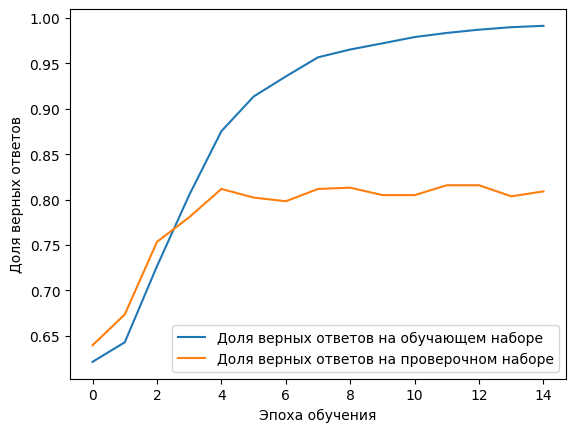

In [29]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [30]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(15, activation='softmax'))

In [31]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [32]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 15)                255       
                                                                 
Total params: 323,391
Trainable params: 323,391
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [33]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [34]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/15
52/52 [==============================] - ETA: 0s - loss: 2.3223 - accuracy: 0.6086 - f1_m: 0.0083 - precision_m: 0.0501 - recall_m: 0.0051        
Epoch 1: val_accuracy improved from -inf to 0.63957, saving model to best_model_lstm.h5
52/52 [==============================] - 12s 153ms/step - loss: 2.3223 - accuracy: 0.6086 - f1_m: 0.0083 - precision_m: 0.0501 - recall_m: 0.0051 - val_loss: 1.5718 - val_accuracy: 0.6396 - val_f1_m: 0.5954 - val_precision_m: 0.7282 - val_recall_m: 0.5041
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 1.4149 - accuracy: 0.6421 - f1_m: 0.6427 - precision_m: 0.6572 - recall_m: 0.6318
Epoch 2: val_accuracy did not improve from 0.63957
52/52 [==============================] - 3s 58ms/step - loss: 1.4149 - accuracy: 0.6421 - f1_m: 0.6427 - precision_m: 0.6572 - recall_m: 0.6318 - val_loss: 1.3049 - val_accuracy: 0.6396 - val_f1_m: 0.6539 - val_precision_m: 0.6710 - val_recall_m: 0.6377
Epoch 3/15
52/52 [=========================

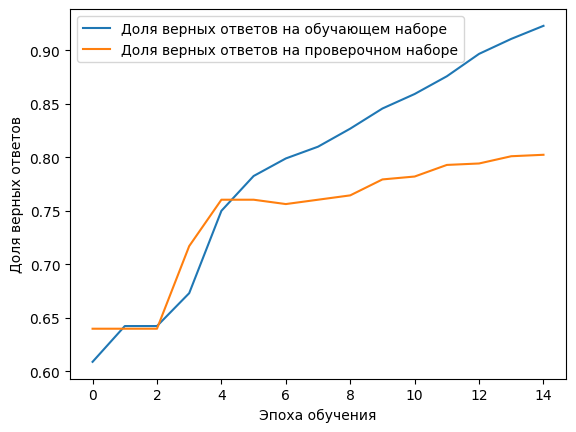

In [35]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [36]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_len))
model_gru.add(GRU(16))
model_gru.add(Dense(15, activation='softmax'))

In [37]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [38]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11, 32)            320000    
                                                                 
 gru (GRU)                   (None, 16)                2400      
                                                                 
 dense_3 (Dense)             (None, 15)                255       
                                                                 
Total params: 322,655
Trainable params: 322,655
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model_gru.h5

In [39]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [40]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/15
52/52 [==============================] - ETA: 0s - loss: 2.4327 - accuracy: 0.5872 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.63957, saving model to best_model_gru.h5
52/52 [==============================] - 10s 135ms/step - loss: 2.4327 - accuracy: 0.5872 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.7814 - val_accuracy: 0.6396 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 1.4457 - accuracy: 0.6421 - f1_m: 0.5398 - precision_m: 0.6076 - recall_m: 0.5215
Epoch 2: val_accuracy did not improve from 0.63957
52/52 [==============================] - 5s 88ms/step - loss: 1.4457 - accuracy: 0.6421 - f1_m: 0.5398 - precision_m: 0.6076 - recall_m: 0.5215 - val_loss: 1.2682 - val_accuracy: 0.6396 - val_f1_m: 0.6853 - val_precision_m: 0.7409 - val_recall_m: 0.6377
Epoch 3/15
52/52

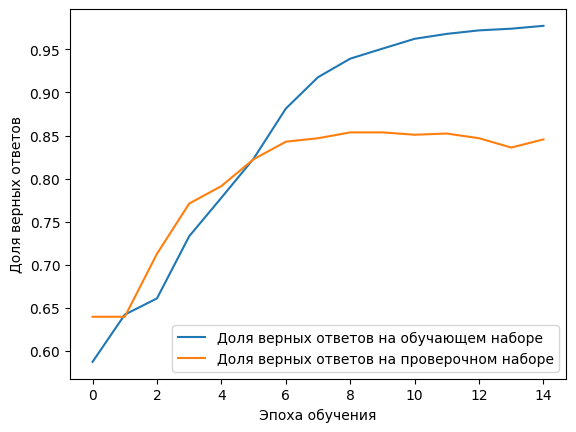

In [41]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования


In [10]:
test

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
5301,😢,8,1,sadness,negative,4,вот казёл! разбил сердце моей сестре 😢
151,😂,5,1,smile,positive/negative,0,странно конечно они выглядят 😂
4426,😌,11,1,joy,positive,2,музыка немного приболела. мы уже начали её леч...
2458,😁,4,1,smile,positive/negative,0,санта барбара?😁
8814,😂,4,1,smile,positive/negative,0,я ради приличия😂
...,...,...,...,...,...,...,...
6069,🤣,7,1,smile,positive/negative,0,гражданство рф но русское это нечто🤣
5390,😢,10,1,sadness,negative,4,у меня всего 376 р отложены на пятницу побухать😢
446,😂,9,1,smile,positive/negative,0,"а женщине что надо, никто не подумал?😂"
4651,😄,5,1,smile,positive/negative,0,просмотр онлайн трансляции бесплатно😄


Преобразуем посты в числовое представление

Нужно использовать токенизатор, обученный на наборе данных train.

In [43]:
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])

In [44]:
x_test = pad_sequences(test_sequences, maxlen=max_len)

In [45]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,  356,   68],
       [   0,    0,    0,    0,    0,    0,    6,   77,  105,   26,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  182,   28,   73,   59],
       [   0,    0,    0,    0,    6,    2,   49, 1502, 2392,   39,   12]],
      dtype=int32)

Правильные ответы

In [46]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [47]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных


### Одномерная сверточная сеть

In [48]:
model_cnn.load_weights(model_cnn_save_path)

In [49]:
loss, accuracy, f1_score, precision, recall = model_cnn.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 6ms/step - loss: 1.0755 - accuracy: 0.8254 - f1_m: 0.8401 - precision_m: 0.8752 - recall_m: 0.8085


### Сеть LSTM

In [50]:
model_lstm.load_weights(model_lstm_save_path)

In [51]:
loss, accuracy, f1_score, precision, recall = model_lstm.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 1s 8ms/step - loss: 0.7394 - accuracy: 0.8178 - f1_m: 0.7995 - precision_m: 0.8890 - recall_m: 0.7289


### Сеть GRU

In [52]:
model_gru.load_weights(model_gru_save_path)

In [53]:
loss, accuracy, f1_score, precision, recall = model_gru.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 6ms/step - loss: 0.6272 - accuracy: 0.8623 - f1_m: 0.8521 - precision_m: 0.8877 - recall_m: 0.8200


In [55]:
test['clean_text'][592]
#test['clean_text'][1246]

'что с ней произошло😱'

In [56]:
#test['class'][2384], test['emotion'][2384], test['tonality'][2384]
test['class'][592], test['emotion'][592], test['tonality'][592]

(5, 'fear', 'negative')

In [57]:
#text = test['clean_text'][2384]
text = test['clean_text'][592]

In [58]:
sequence = tokenizer.texts_to_sequences([text])

In [59]:
sequence

[[7, 15, 349]]

In [60]:
data = pad_sequences(sequence, maxlen=max_len)

In [61]:
data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   7,  15, 349]],
      dtype=int32)

In [62]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

### Одномерная сверточная сеть

In [63]:
result_cnn = model_cnn.predict(data)

1/1 [==============================] - 0s 152ms/step


In [64]:
result_cnn

array([[5.4545008e-02, 3.2722883e-02, 1.1382931e-04, 1.3447827e-01,
        3.6371970e-03, 5.9536304e-03, 2.4142959e-03, 7.9018553e-04,
        2.7207631e-01, 2.0640967e-03, 3.1390067e-02, 3.8630906e-01,
        2.6223147e-02, 4.2547341e-02, 4.7346517e-03]], dtype=float32)

### Сеть LSTM

In [65]:
result_lstm = model_lstm.predict(data)

1/1 [==============================] - 1s 845ms/step


In [66]:
result_lstm

array([[0.08107336, 0.66497684, 0.02520213, 0.03128015, 0.1287684 ,
        0.01705673, 0.01268354, 0.0119066 , 0.00482429, 0.007228  ,
        0.00359351, 0.00424034, 0.00367895, 0.00227674, 0.00121047]],
      dtype=float32)

### Сеть GRU

In [67]:
result_gru = model_gru.predict(data)

1/1 [==============================] - 0s 343ms/step


In [68]:
result_gru

array([[0.13686481, 0.47078794, 0.05611372, 0.20285816, 0.05609328,
        0.01656615, 0.00395629, 0.01083615, 0.00647077, 0.00574919,
        0.0100572 , 0.00518024, 0.01060875, 0.00425235, 0.00360492]],
      dtype=float32)